In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
import keras.backend as kb

In [28]:
data = pd.read_csv(filepath_or_buffer=r'./banknotes.csv')
X = data.drop(columns=['class']).values
y = data['class'].values
data.head(3)

,variace,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


# Effect of Learning rate

In [46]:
result_list=[]
learning_rates = [.001, .01, .05, .1, .5]

In [47]:
for lr in learning_rates:
    
    kb.clear_session()
    
    model = Sequential()
    model.add(Dense(units=1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer=SGD(lr=lr),
                 metrics=['accuracy'])
    
    h = model.fit(X, y, batch_size = 16, verbose=0, epochs=20)
    
    result_list.append( pd.DataFrame(data=h.history, index = h.epoch ))
    

In [48]:
historydf = pd.concat(result_list, axis=1)

In [49]:
historydf.head()

,loss,acc,loss,acc,loss,acc,loss,acc,loss,acc
0,2.793997,0.481050,0.365537,0.852770,0.467014,0.813411,0.174160,0.948251,0.107600,0.960641
1,2.501112,0.483236,0.230614,0.914723,0.136135,0.951895,0.085662,0.979592,0.050041,0.984694
2,2.209006,0.483965,0.188687,0.932216,0.106639,0.967930,0.067813,0.983965,0.042526,0.983965
3,1.928798,0.487609,0.164566,0.940233,0.090956,0.974490,0.059032,0.987609,0.034398,0.988338
4,1.666813,0.493440,0.148146,0.948980,0.079674,0.977405,0.053325,0.986152,0.038251,0.984694


In [50]:
columns = result_list[0].columns
idx = pd.MultiIndex.from_product([learning_rates, columns],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [51]:
historydf.head()

learning_rate     0.001               0.010               0.050               0.100               0.500          
metric             loss       acc      loss       acc      loss       acc      loss       acc      loss       acc
0              2.793997  0.481050  0.365537  0.852770  0.467014  0.813411  0.174160  0.948251  0.107600  0.960641
1              2.501112  0.483236  0.230614  0.914723  0.136135  0.951895  0.085662  0.979592  0.050041  0.984694
2              2.209006  0.483965  0.188687  0.932216  0.106639  0.967930  0.067813  0.983965  0.042526  0.983965
3              1.928798  0.487609  0.164566  0.940233  0.090956  0.974490  0.059032  0.987609  0.034398  0.988338
4              1.666813  0.493440  0.148146  0.948980  0.079674  0.977405  0.053325  0.986152  0.038251  0.984694

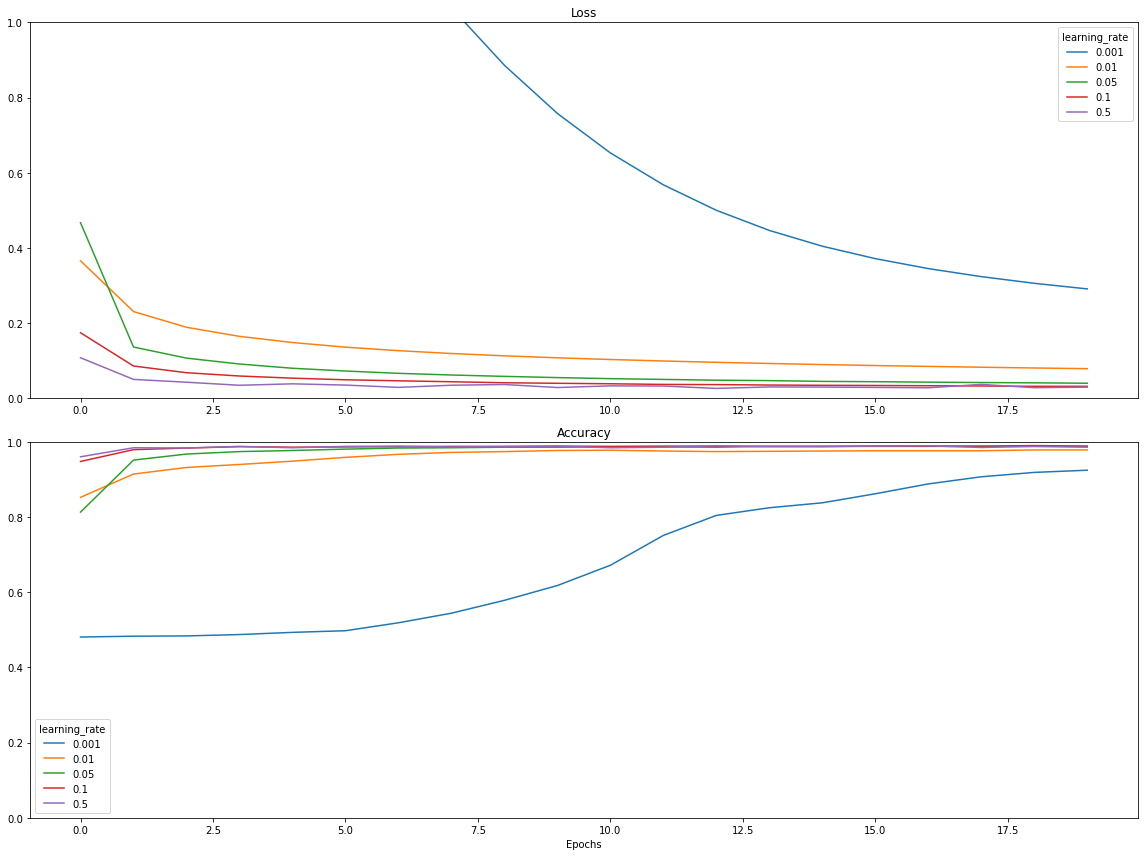

In [52]:
plt.figure(figsize=(16,12))
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Effect of batch size

In [55]:
result_list=[]
batch_sizes = [1, 16, 32, 64]

for b_size in batch_sizes:
    
    kb.clear_session()
    
    model = Sequential()
    model.add(Dense(units=1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])
    
    h = model.fit(X, y, verbose=0, epochs=20, batch_size=b_size)
    
    result_list.append( pd.DataFrame(data=h.history, index = h.epoch ))
    

In [57]:
historydf = pd.concat(result_list, axis=1)
columns = result_list[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, columns],
                                 names=['Batch size', 'metric'])

historydf.columns = idx

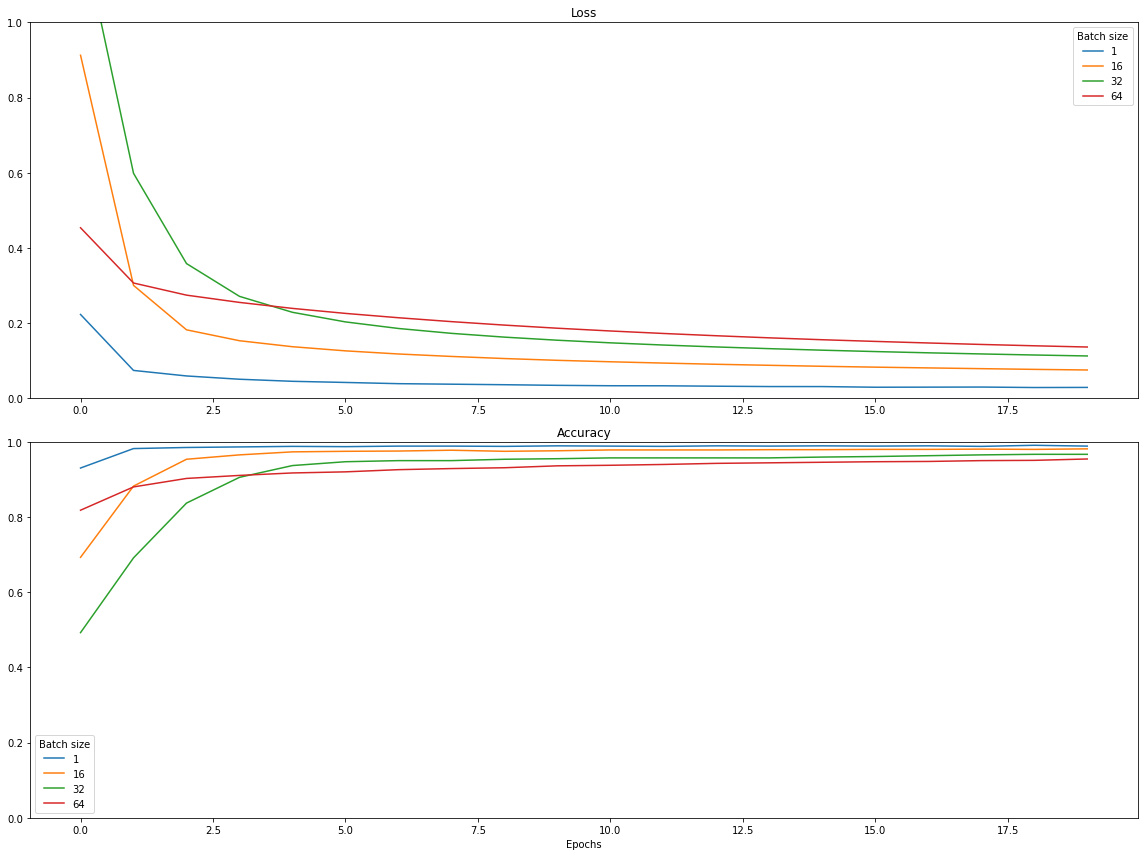

In [58]:
plt.figure(figsize=(16,12))
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Effect of optimizers

In [59]:
result_list=[]
optimzers_sizes = ['SGD(lr=0.01)',
                  'SGD(lr=0.01, momentum=0.3)',
                  'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
                  'Adam(lr=0.01)',
                  'Adagrad(lr=0.01)',
                  'RMSprop(lr=0.01)']

for optimizer in optimzers_sizes:
    
    kb.clear_session()
    
    model = Sequential()
    model.add(Dense(units=1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer=eval(optimizer),
                 metrics=['accuracy'])
    
    h = model.fit(X, y, verbose=0, epochs=20, batch_size=16)
    
    result_list.append( pd.DataFrame(data=h.history, index = h.epoch ))
    

In [61]:
historydf = pd.concat(result_list, axis=1)
columns = result_list[0].columns
idx = pd.MultiIndex.from_product([optimzers_sizes, columns],
                                 names=['Batch size', 'metric'])

historydf.columns = idx

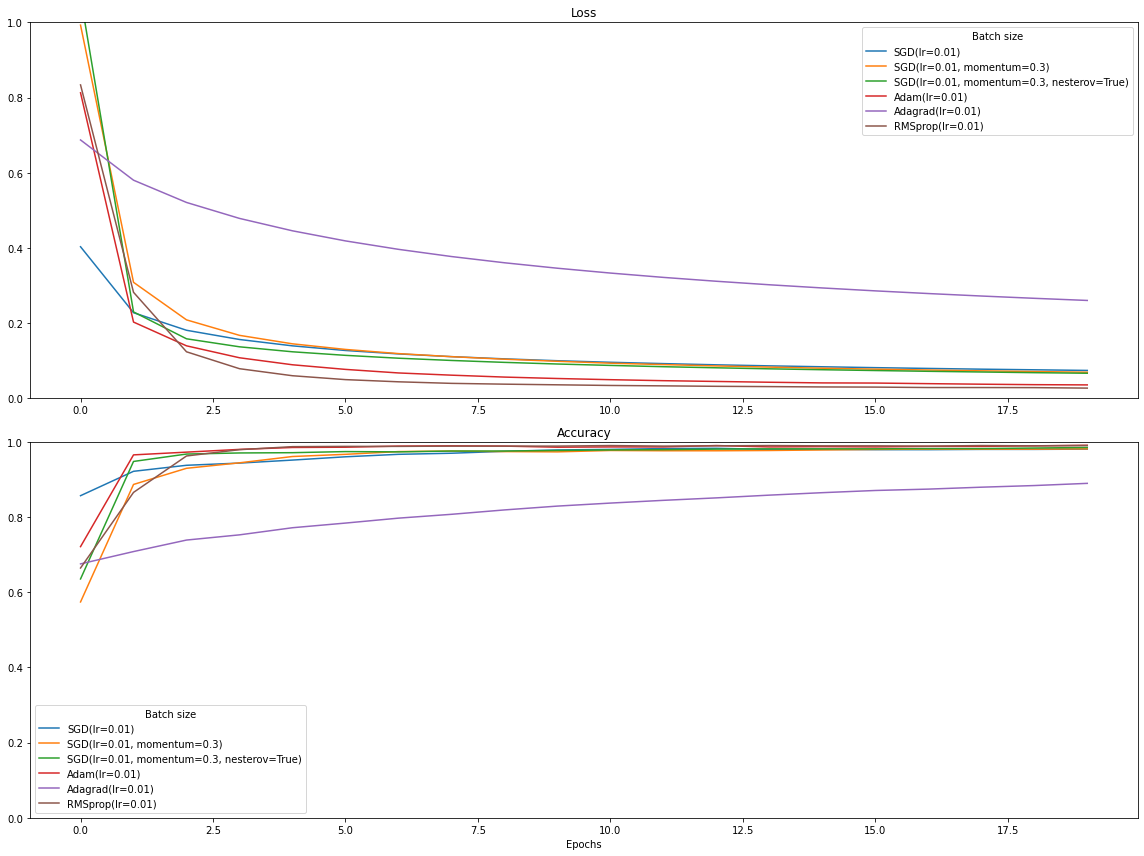

In [62]:
plt.figure(figsize=(16,12))
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# effect on weight initializers

In [64]:
result_list=[]
weight_initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for weight_initializer in weight_initializers:
    
    kb.clear_session()
    
    model = Sequential()
    model.add(Dense(units=1, input_shape=(4,), activation='sigmoid', kernel_initializer=weight_initializer))
    model.compile(loss='binary_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])
    
    h = model.fit(X, y, verbose=0, epochs=20, batch_size=16)
    
    result_list.append( pd.DataFrame(data=h.history, index = h.epoch ))
    

In [65]:
historydf = pd.concat(result_list, axis=1)
columns = result_list[0].columns
idx = pd.MultiIndex.from_product([weight_initializers, columns],
                                 names=['Batch size', 'metric'])

historydf.columns = idx

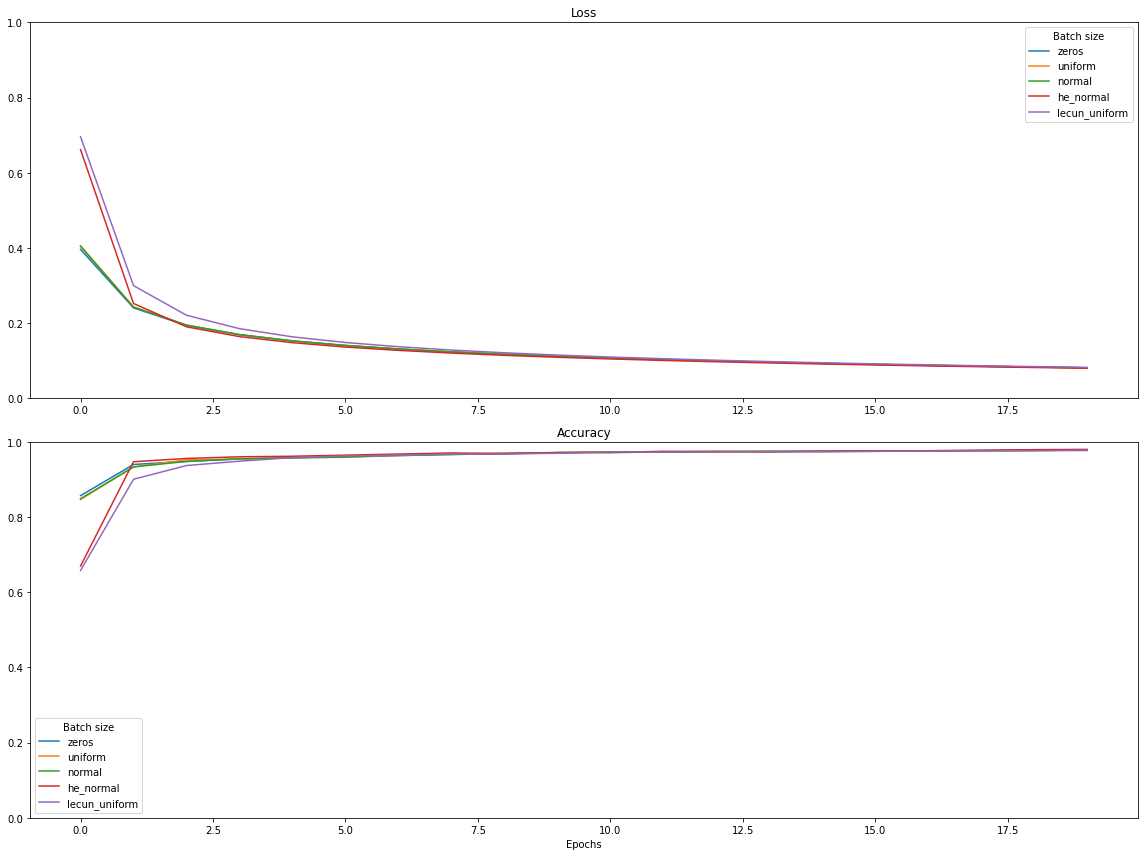

In [66]:
plt.figure(figsize=(16,12))
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()